In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_skill(exp='subfilter/FGR3/EXP1', factors=[4,9,12,15], base_path='/scratch/pp2681/mom6/CM26_ML_models/ocean3d/'):
    ds = {}
    for factor in factors:
        data = xr.open_dataset(f'{base_path}/{exp}/skill-test/factor-{factor}.nc', chunks={'zl':1})
        data['zl'] = -data['zl']
        ds[factor] = data
        
    return ds

In [3]:
read_skill('subfilter-Taper/FGR3/1x1-20');

In [4]:
import cmocean
def plot_metric(exp=None, metric='R2',vmin=0,vmax=1):
    data = xr.concat([exp[factor][metric] for factor in [4,9,12,15]], dim='factor')
    data.drop_vars(['zl']).plot(x='factor', y='zl',cmap=cmocean.cm.balance, vmin=vmin, vmax=vmax, cbar_kwargs={'label':''})
    plt.yticks(np.arange(10),[5, 55, 110, 180,330, 730,1500,2500,3500,4500]);
    plt.ylabel('Depth, m')
    plt.xticks(np.arange(4),[4,9,12,15]);
    if metric == 'R2':
        title_str = '$R^2$'
    elif metric == 'corr':
        title_str = 'Correlation'
    elif metric == 'opt_scaling':
        title_str = 'Optimal scaling'
    
    mean_val = float(data.mean())
    std_val = float(data.std())
    plt.title(metric+'\n [mean/std]=[%.3f,%.3f]' % (mean_val,std_val))
    
    plt.xlabel('Coarsegraining factor')
    plt.gca().invert_yaxis()

In [5]:
def plot_transfer(transfer, freq_str='freq_r_NA', zl=0, color='tab:blue'):
    mean = transfer.mean('time').isel(zl=zl)
    std = transfer.std('time').isel(zl=zl)
    
    mean.plot(xscale='log',color=color,lw=2)
    plt.fill_between(mean[freq_str],mean-std,mean+std,alpha=0.05,color=color, linewidth=0)

In [6]:
def plot_transfer_4_regions(exps=[],labels=[],zl=5,factor=4):
    plt.figure(figsize=(10,8))
    plt.rcParams['font.size']=12

    colors= ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:pink', 'tab:cyan', 'tab:olive', 'tab:brown', 'gray']
    
    plt.subplot(2,2,1)
    plot_transfer(exps[0][factor].transfer_NA,'freq_r_NA',color='k',zl=zl)
    for exp, color in zip(exps, colors):
        plot_transfer(exp[factor].transfer_ZB_NA,'freq_r_NA',zl=zl,color=color)
    plt.ylabel('Compensated energy transfer m$^2$/s$^3$')
    plt.title('North Atlantic')
    plt.axhline(y=0,color='gray')
    plt.xlabel('Wavenumber, m$^{-1}$')
    plt.axvline(x=1/(22.6e+3), color='tab:gray', ls='--')
    plt.xlim([1e-6,2e-4])

    plt.subplot(2,2,2)
    plot_transfer(exps[0][factor].transfer_Pacific,'freq_r_Pacific',color='k',zl=zl)
    for exp, color in zip(exps,colors):
        plot_transfer(exp[factor].transfer_ZB_Pacific,'freq_r_Pacific',zl=zl,color=color)
    plt.ylabel('Compensated energy transfer m$^2$/s$^3$')
    plt.title('Pacific')
    plt.axhline(y=0,color='gray')
    plt.xlabel('Wavenumber, m$^{-1}$')
    plt.axvline(x=1/(28.5e+3), color='tab:gray', ls='--')
    plt.xlim([1e-6,2e-4])
    
    plt.subplot(2,2,3)
    plot_transfer(exps[0][factor].transfer_ACC,'freq_r_ACC',color='k',zl=zl)
    for exp,color in zip(exps,colors):
        plot_transfer(exp[factor].transfer_ZB_ACC,'freq_r_ACC',zl=zl,color=color)
    plt.ylabel('Compensated energy transfer m$^2$/s$^3$')
    plt.title('ACC')
    plt.axhline(y=0,color='gray')
    plt.xlabel('Wavenumber, m$^{-1}$')
    plt.axvline(x=1/(10.5e+3), color='tab:gray',ls='--')
    plt.xlim([1e-6,2e-4])
        
    plt.subplot(2,2,4)
    plot_transfer(exps[0][factor].transfer_Equator,'freq_r_Equator',color='k',zl=zl)
    for exp,color in zip(exps,colors):
        plot_transfer(exp[factor].transfer_ZB_Equator,'freq_r_Equator',zl=zl,color=color)
    plt.ylabel('Compensated energy transfer m$^2$/s$^3$')
    plt.title('Equator')
    plt.axhline(y=0,color='gray')
    plt.xlabel('Wavenumber, m$^{-1}$')
    plt.tight_layout()
    plt.axvline(x=1/(89.9e+3), color='tab:gray',ls='--')
    plt.xlim([1e-6,2e-4])
    
    plt.plot(np.nan,np.nan,color='k',label='SFS')
    for label, color in zip(labels,colors):
        plt.plot(np.nan,np.nan,color=color,label=label)
    plt.plot(np.nan,np.nan,color='gray',ls='--',label='$1/R_d$')
    plt.legend(bbox_to_anchor=(1,1))
    
    plt.suptitle(f'Coarsegraining factor: {factor}, Depth: %.0f m' % (float(-exp[factor].zl[zl])), y=1.03)

In [7]:
gauss = read_skill('subfilter/FGR3/EXP1')
gauss_32_32 = read_skill('subfilter/FGR3/EXP-32-32/repeat')

In [10]:
taper = {}
for key in ['1x1-20',  '1x1-20-Rd-dx',  '1x1-32-32',  '1x1-32-32-all-nd-numbers',  '1x1-32-32-Rd-dx',  '3x3-20',  '3x3-20-Rd-dx',  '3x3-32-32',  '3x3-32-32-all-nd-numbers',  '3x3-32-32-Rd-dx']:
    taper[key] = read_skill(f'subfilter-Taper/FGR3/{key}')

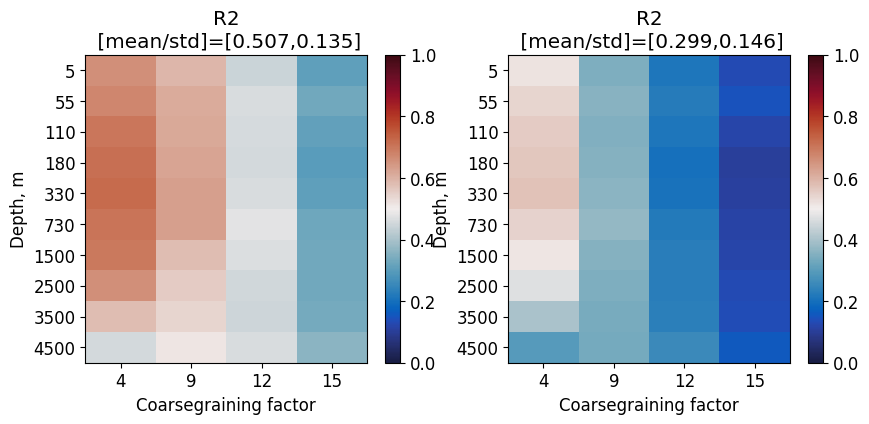

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_metric(gauss, 'R2')
plt.subplot(1,2,2)
plot_metric(taper['3x3-20'], 'R2')

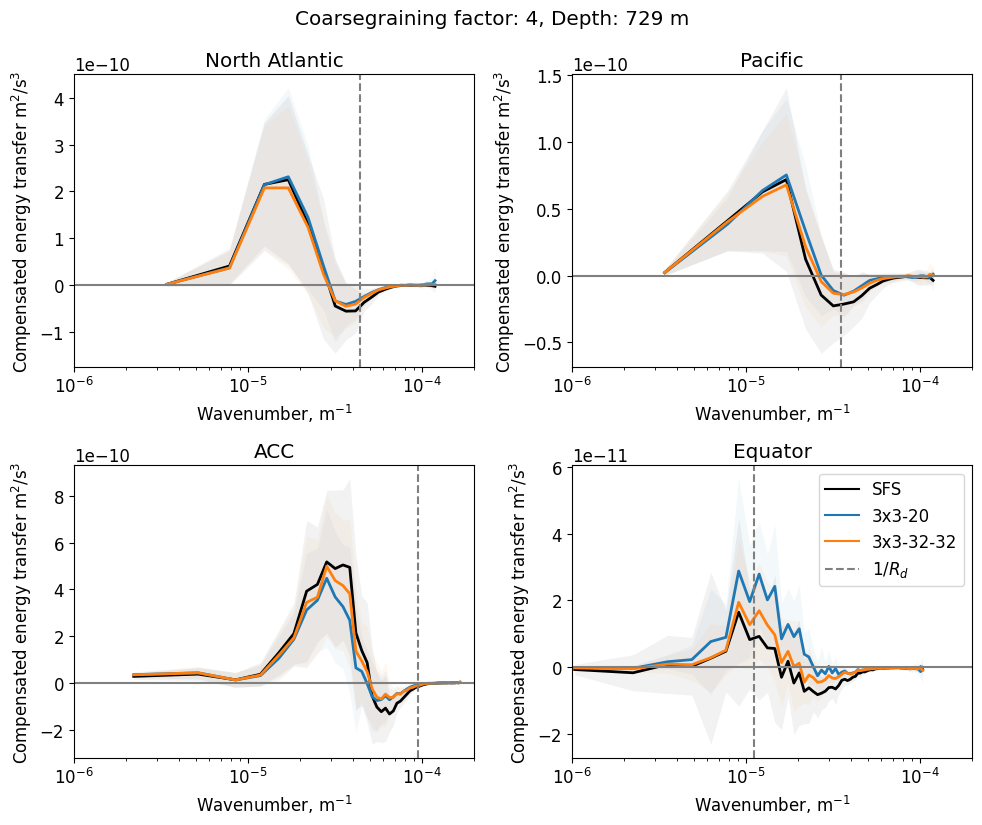

In [12]:
plot_transfer_4_regions([gauss, gauss_32_32], ['3x3-20', '3x3-32-32'])

# Mild sensitivity to the number of neurons and Rd/dx

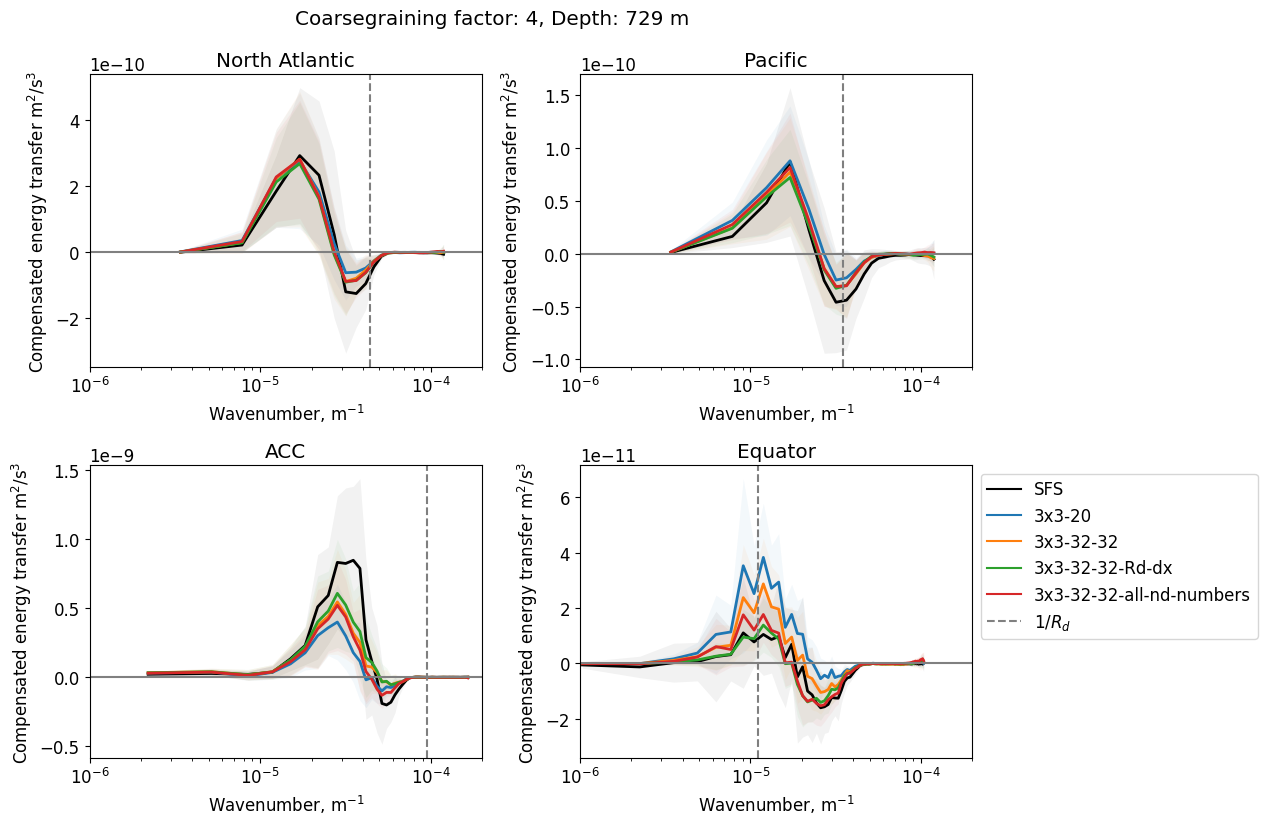

In [14]:
exps = ['3x3-20', '3x3-32-32', '3x3-32-32-Rd-dx', '3x3-32-32-all-nd-numbers']
plot_transfer_4_regions([taper[exp] for exp in exps], exps)

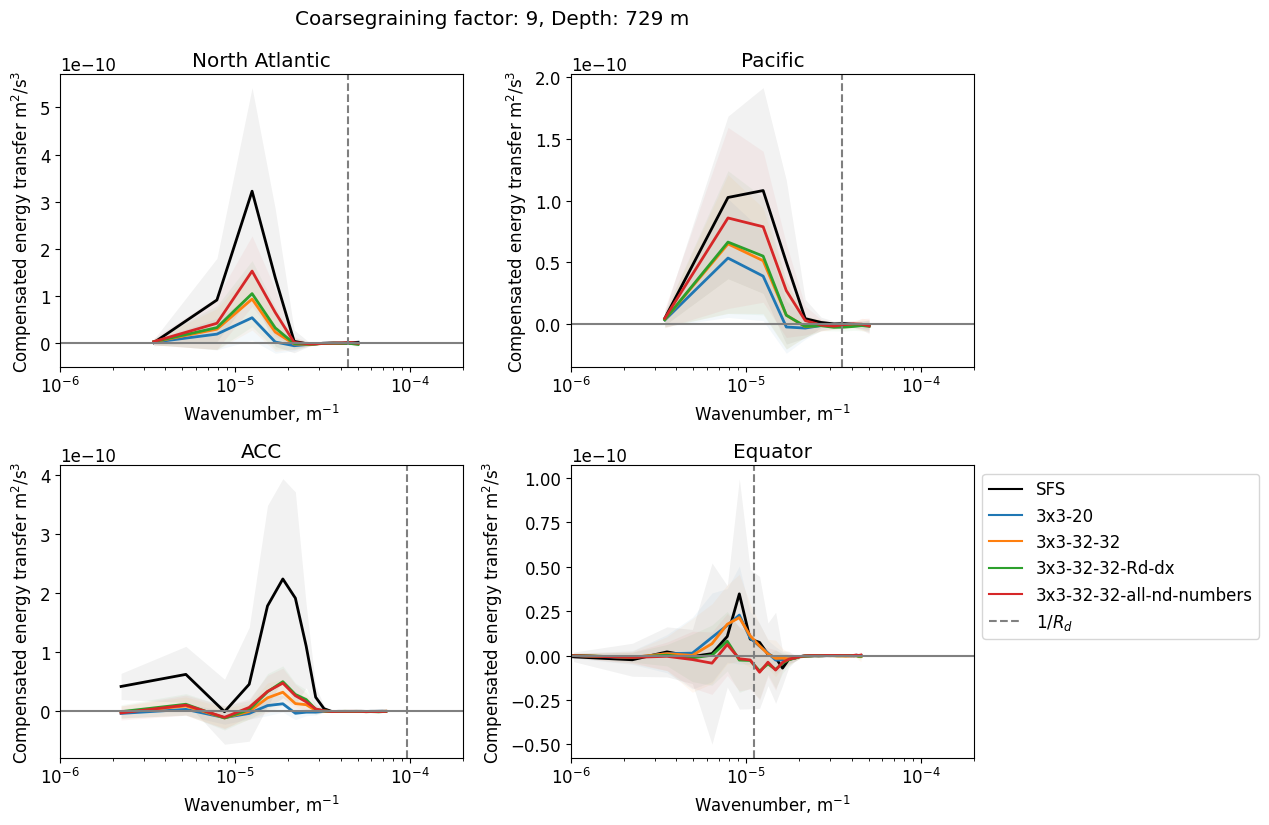

In [16]:
exps = ['3x3-20', '3x3-32-32', '3x3-32-32-Rd-dx', '3x3-32-32-all-nd-numbers']
plot_transfer_4_regions([taper[exp] for exp in exps], exps, factor=9)

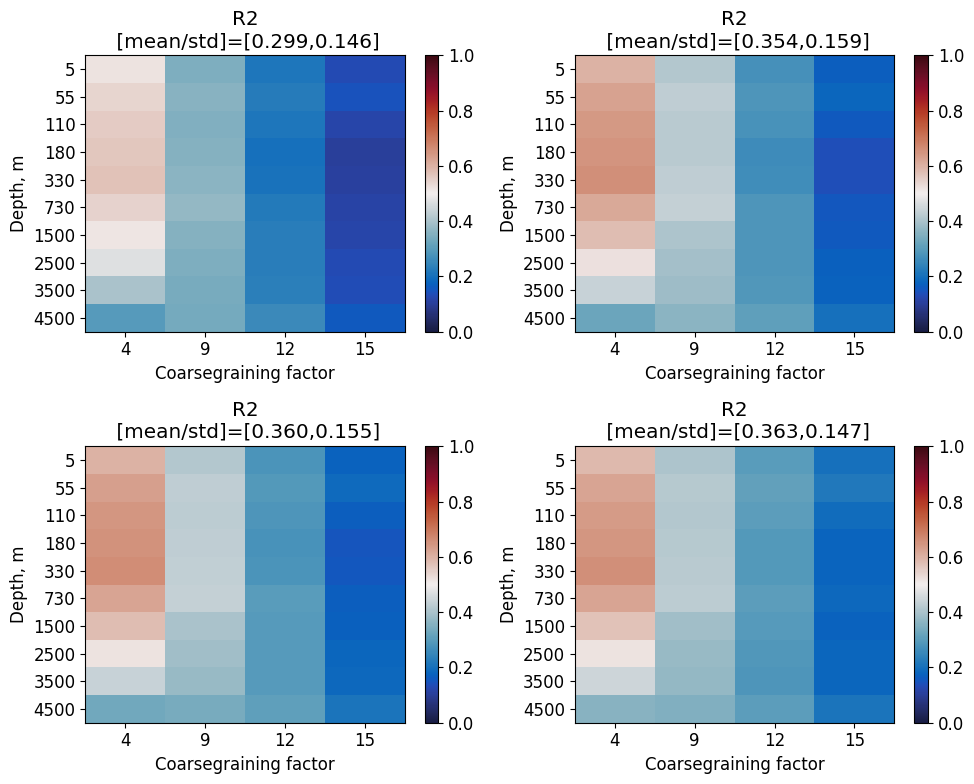

In [18]:
plt.figure(figsize=(10,8))
for j, exp in enumerate(['3x3-20', '3x3-32-32', '3x3-32-32-Rd-dx', '3x3-32-32-all-nd-numbers']):
    plt.subplot(2,2,j+1)
    plot_metric(taper[exp], 'R2')
plt.tight_layout()

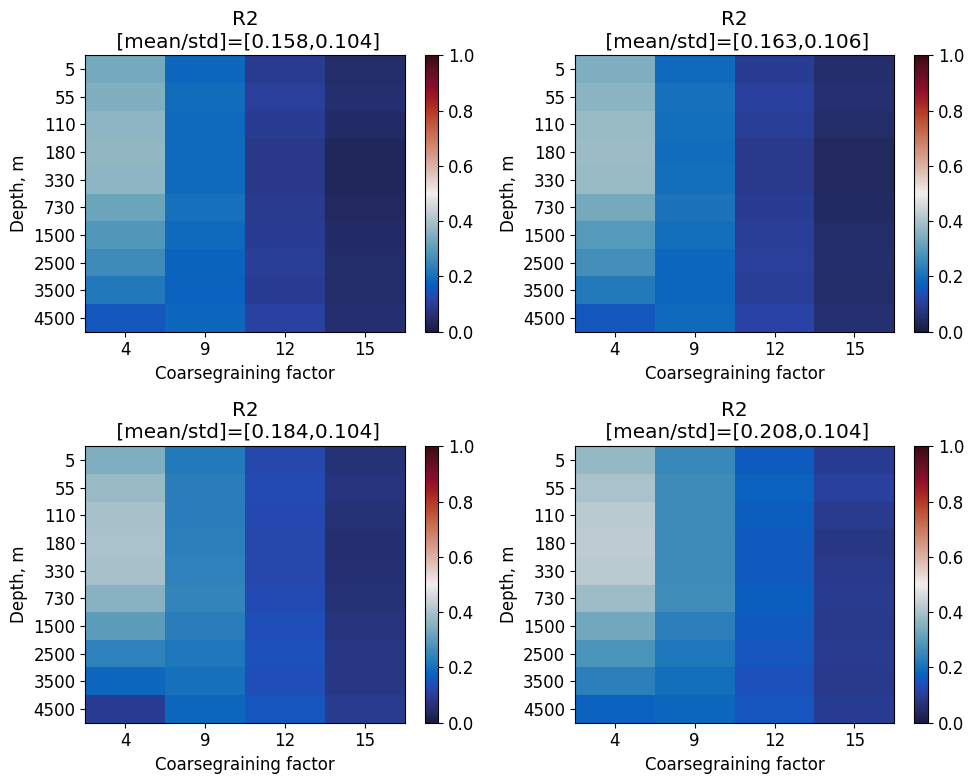

In [19]:
plt.figure(figsize=(10,8))
for j, exp in enumerate(['1x1-20', '1x1-32-32', '1x1-32-32-Rd-dx', '1x1-32-32-all-nd-numbers']):
    plt.subplot(2,2,j+1)
    plot_metric(taper[exp], 'R2')
plt.tight_layout()

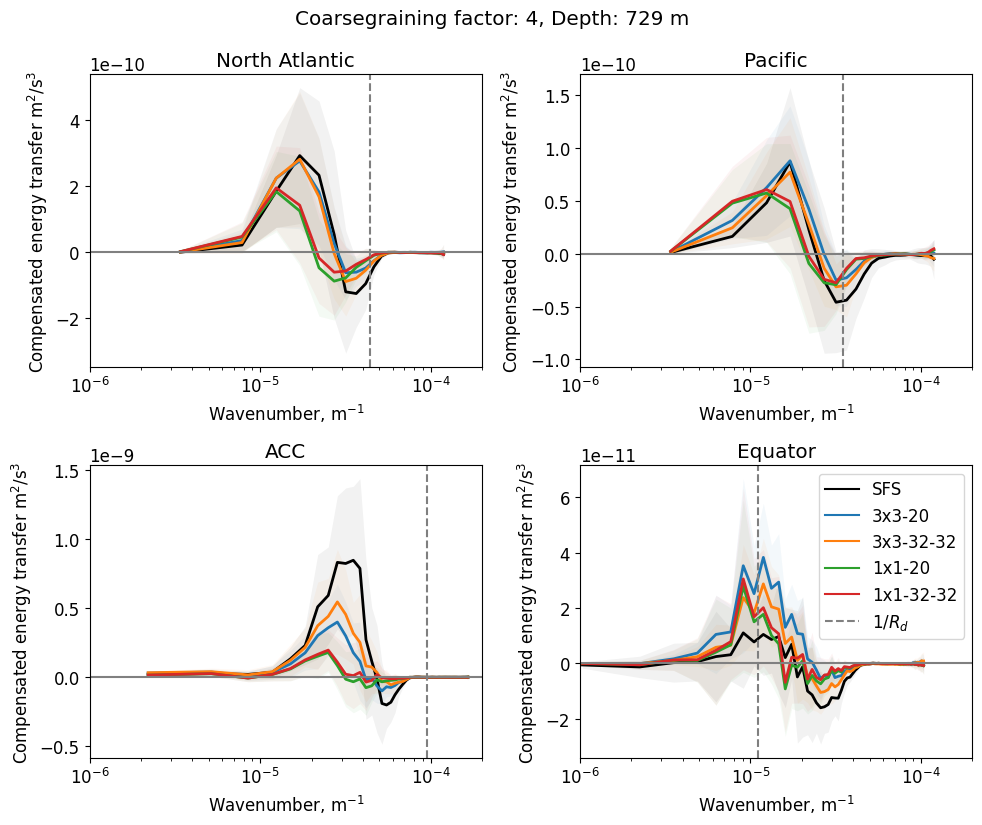

In [20]:
exps = ['3x3-20', '3x3-32-32', '1x1-20', '1x1-32-32']
plot_transfer_4_regions([taper[exp] for exp in exps], exps)

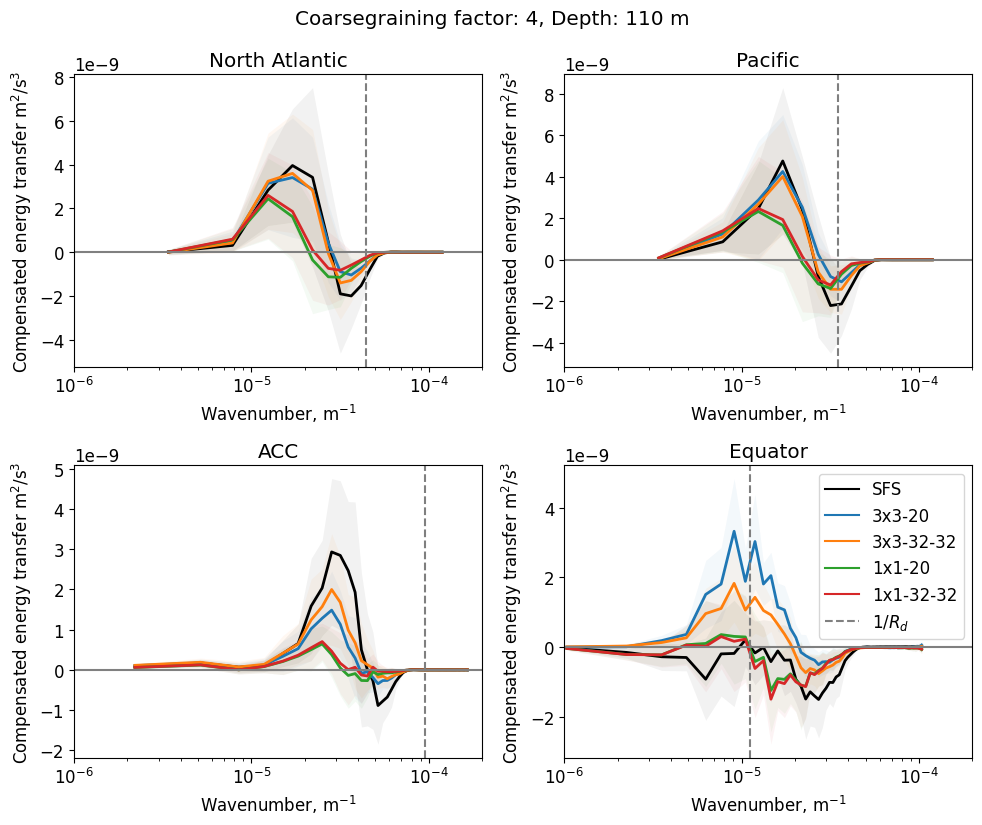

In [22]:
exps = ['3x3-20', '3x3-32-32', '1x1-20', '1x1-32-32']
plot_transfer_4_regions([taper[exp] for exp in exps], exps, zl=2)

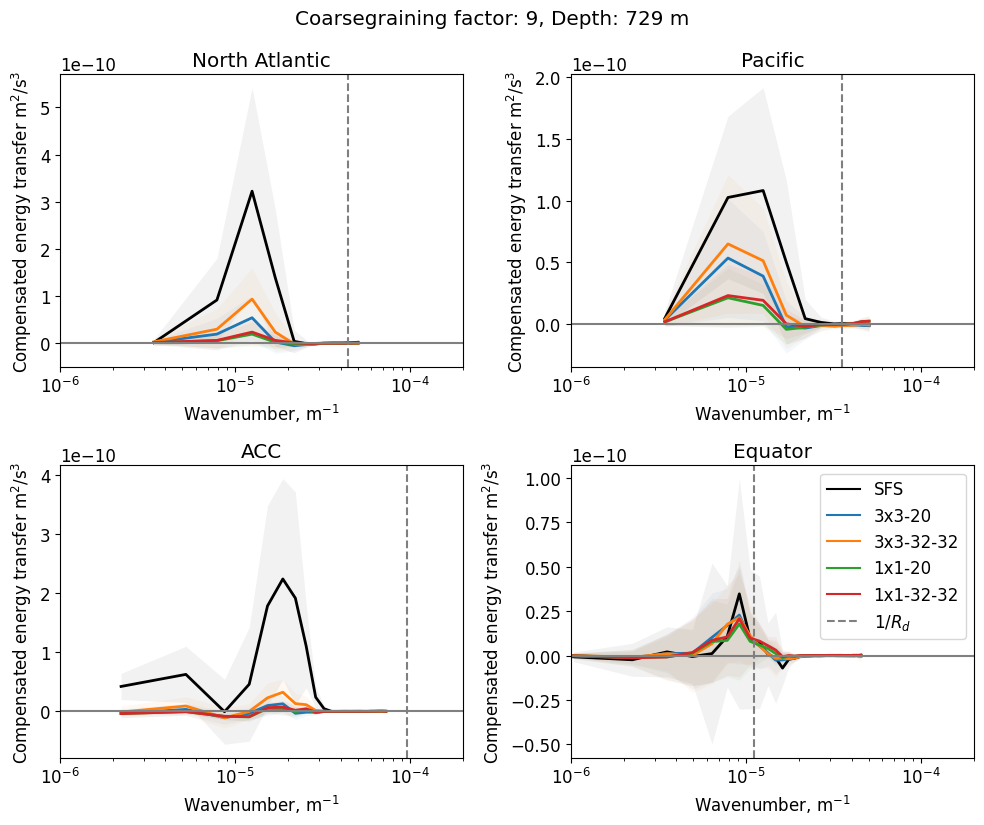

In [23]:
exps = ['3x3-20', '3x3-32-32', '1x1-20', '1x1-32-32']
plot_transfer_4_regions([taper[exp] for exp in exps], exps, factor=9)

In [25]:
ds = xr.open_dataset('/scratch/pp2681/mom6/CM26_ML_models/ocean3d/subfilter-Taper/FGR3/3x3-20/model/logger.nc')

(0.0, 1.0)

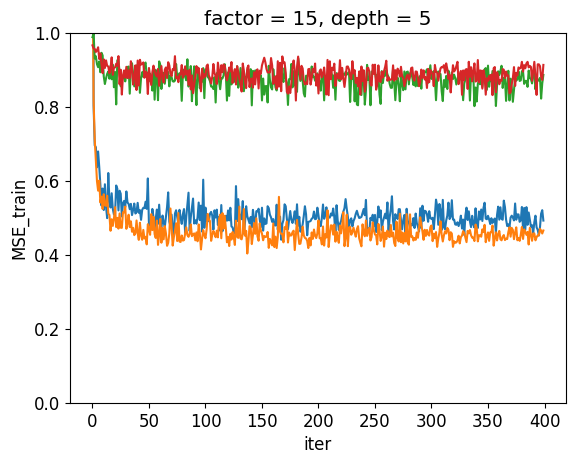

In [35]:
ds.MSE_train.isel(factor=0,depth=0).plot()
ds.MSE_train.isel(factor=0,depth=5).plot()
ds.MSE_train.isel(factor=-1,depth=0).plot()
ds.MSE_train.isel(factor=-1,depth=5).plot()
plt.ylim([0,1])

In [3]:
gauss = xr.open_dataset('/scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter/FGR3/factor-4/train-0.nc')

In [4]:
taper = xr.open_dataset('/scratch/pp2681/mom6/CM26_datasets/ocean3d/subfilter-Taper/FGR3/factor-4/train-0.nc')

In [19]:
import sys
sys.path.append('../')
from helpers.computational_tools import *

Correlation: 0.9944326934768923
Relative Error: 0.13972395658493042
R2 =  0.9812196455895901
R2 max =  0.9889269415289164
Optinal scaling: 1.0968295335769653
Nans [test/control]: [0, 0]


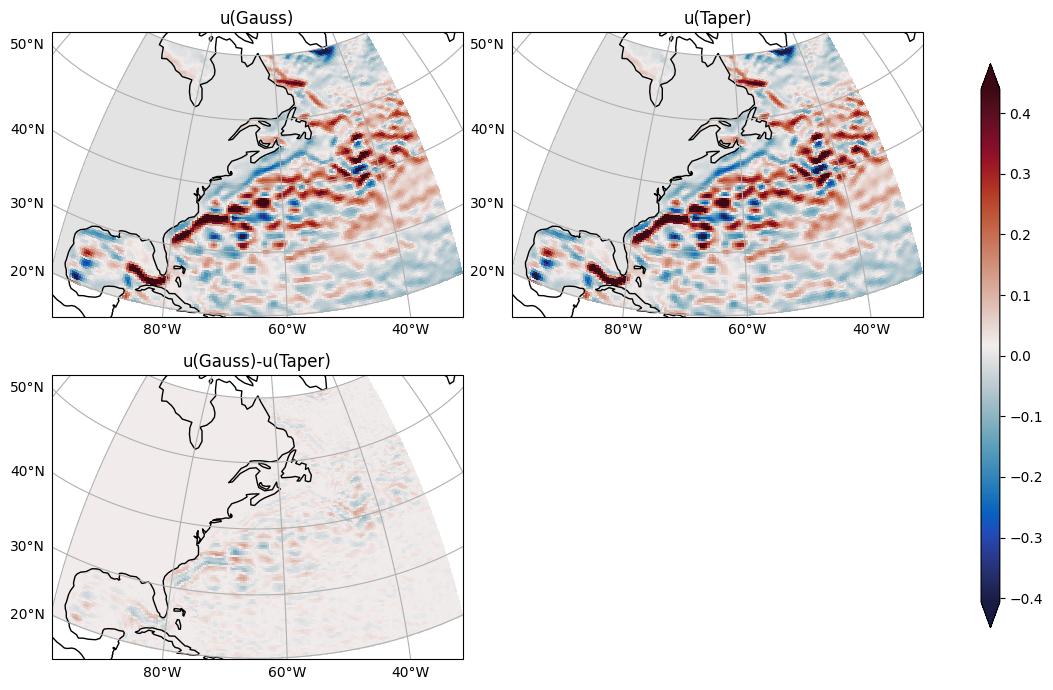

In [24]:
compare(gauss.u, taper.u, label_test='u(Gauss)', label_control='u(Taper)')

Correlation: 0.9944398128209534
Relative Error: 0.13860945403575897
R2 =  0.9816158749163151
R2 max =  0.9889177996665239
Optinal scaling: 1.0940066576004028
Nans [test/control]: [0, 0]


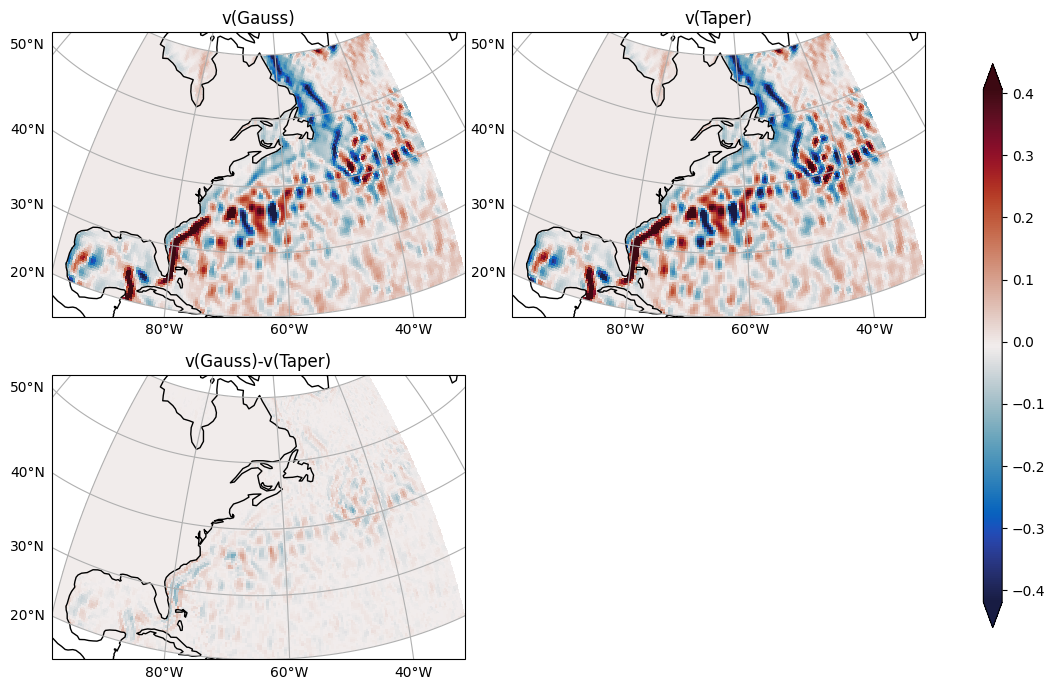

In [26]:
compare(gauss.v, taper.v, label_test='v(Gauss)', label_control='v(Taper)')

Correlation: 0.8606312093421825
Relative Error: 0.5015854239463806
R2 =  0.7405584752559662
R2 max =  0.740762859582901
Optinal scaling: 1.0168907642364502
Nans [test/control]: [0, 0]


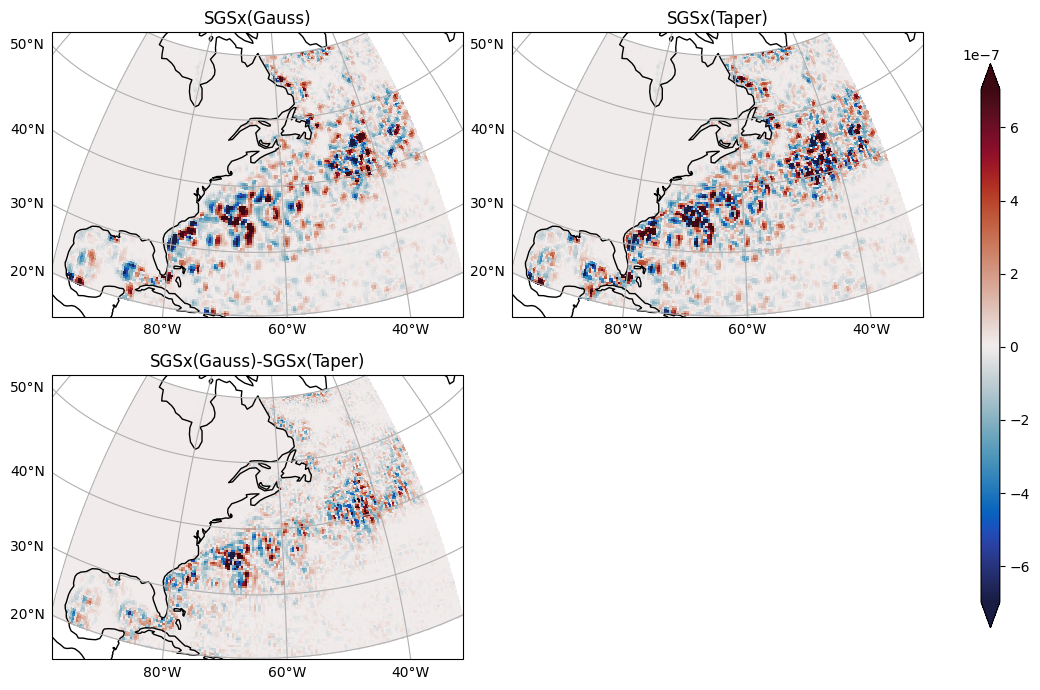

In [25]:
compare(gauss.SGSx, taper.SGSx, label_test='SGSx(Gauss)', label_control='SGSx(Taper)')

Correlation: 0.860903002750541
Relative Error: 0.50160813331604
R2 =  0.7374956607818604
R2 max =  0.7411737143993378
Optinal scaling: 1.0757834911346436
Nans [test/control]: [0, 0]


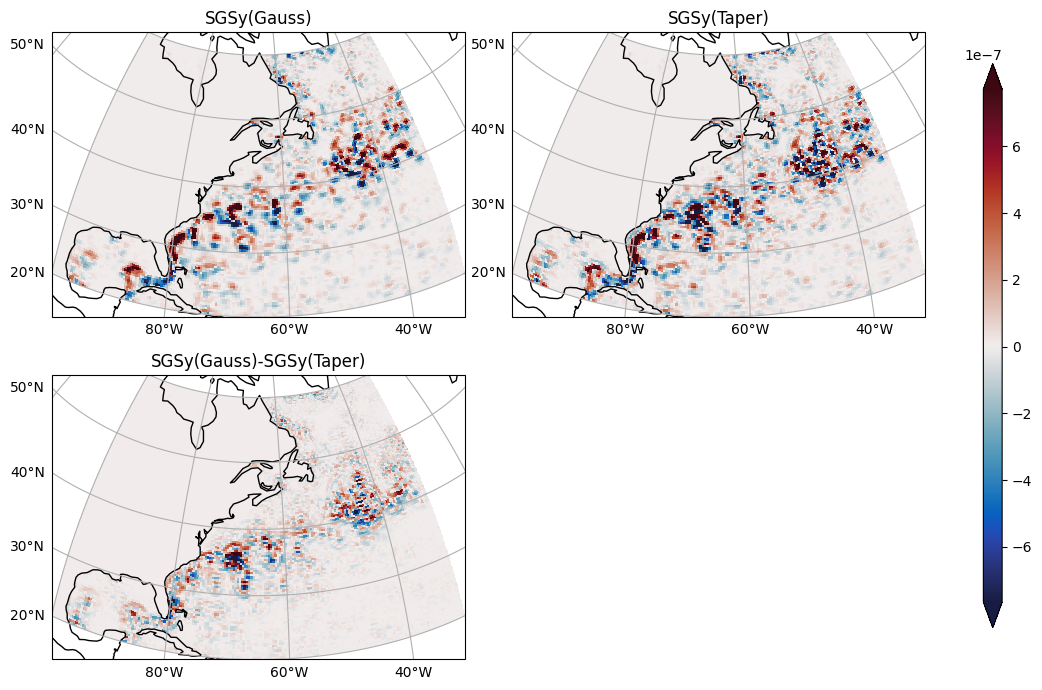

In [27]:
compare(gauss.SGSy, taper.SGSy, label_test='SGSy(Gauss)', label_control='SGSy(Taper)')